In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

**Data Collecting**

In [19]:
from google.colab import files
uploaded = files.upload()

Saving life_expectancy.csv to life_expectancy (1).csv


In [20]:
df = pd.read_csv('life_expectancy.csv')
df.head()

,Country,Sum of Females Life Expectancy,Sum of Life Expectancy (both sexes),Sum of Males Life Expectancy
0,Chad,57.19,55.24,53.36
1,Nigeria,54.94,54.64,54.33
2,South Sudan,60.75,57.74,54.76
3,Lesotho,60.44,57.80,55.03
4,Central African Republic,59.56,57.67,55.51


**Explanatory Data Analysis**

In [21]:
df.describe()

,Sum of Females Life Expectancy,Sum of Life Expectancy (both sexes),Sum of Males Life Expectancy
count,200.000000,200.000000,200.000000
mean,76.776900,74.133700,71.517200
std,8.820332,8.571318,8.419633
min,54.940000,54.640000,53.360000
25%,71.300000,68.732500,66.270000
50%,77.955000,74.700000,71.250000
75%,81.985000,79.062500,76.565000
max,149.220000,143.280000,137.640000


In [22]:
# Pengecekan apakah ada data yang kosong
df.isna().sum()

,0
Country,0
Sum of Females Life Expectancy,0
Sum of Life Expectancy (both sexes),0
Sum of Males Life Expectancy,0


**Data Prepocessing**

In [23]:
print(df.columns)

Index(['Country', 'Sum of Females  Life Expectancy',
       'Sum of Life Expectancy  (both sexes)',
       'Sum of Males  Life Expectancy'],
      dtype='object')


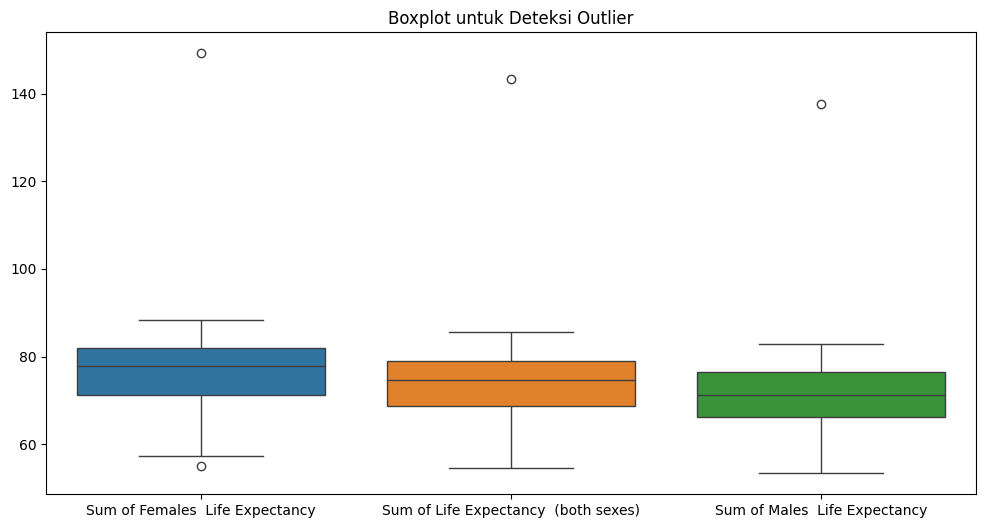

In [24]:
# Visualisasi outlier menggunakan boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Sum of Females  Life Expectancy','Sum of Life Expectancy  (both sexes)','Sum of Males  Life Expectancy']])
plt.title("Boxplot untuk Deteksi Outlier")
plt.show()

In [25]:
# ingin melihat jumlah outlier
# Daftar fitur yang ingin dicek outliernya
columns_to_check = ['Sum of Females  Life Expectancy','Sum of Life Expectancy  (both sexes)','Sum of Males  Life Expectancy']

# Menyimpan jumlah outlier
outlier_counts = {}

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menentukan jumlah outlier
    outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outlier_counts[col] = outlier_count

# Menampilkan jumlah outlier
for feature, count in outlier_counts.items():
    print(f"Jumlah outlier pada {feature}: {count}")


Jumlah outlier pada Sum of Females  Life Expectancy: 2
Jumlah outlier pada Sum of Life Expectancy  (both sexes): 1
Jumlah outlier pada Sum of Males  Life Expectancy: 1


In [26]:
import pandas as pd

columns_to_check = ['Sum of Females  Life Expectancy','Sum of Life Expectancy  (both sexes)','Sum of Males  Life Expectancy']

# Inisialisasi dictionary untuk menyimpan jumlah outlier sebelum dan sesudah perbaikan
outlier_counts_before = {}
outlier_counts_after = {}

# Simpan indeks baris yang mengandung outlier
outlier_indices = set()

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Simpan jumlah outlier sebelum penghapusan
    outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_counts_before[col] = outlier_mask.sum()

    # Simpan indeks outlier
    outlier_indices.update(df[outlier_mask].index)

# Hapus semua baris yang mengandung outlier di salah satu kolom
df = df.drop(index=outlier_indices)

# Hitung jumlah outlier setelah penghapusan
for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_counts_after[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

# Menampilkan jumlah outlier sebelum dan sesudah perbaikan
print("Jumlah outlier sebelum perbaikan:")
for feature, count in outlier_counts_before.items():
    print(f"Jumlah outlier pada {feature}: {count}")

print("\nJumlah outlier setelah perbaikan:")
for feature, count in outlier_counts_after.items():
    print(f"Jumlah outlier pada {feature}: {count}")


Jumlah outlier sebelum perbaikan:
Jumlah outlier pada Sum of Females  Life Expectancy: 2
Jumlah outlier pada Sum of Life Expectancy  (both sexes): 1
Jumlah outlier pada Sum of Males  Life Expectancy: 1

Jumlah outlier setelah perbaikan:
Jumlah outlier pada Sum of Females  Life Expectancy: 0
Jumlah outlier pada Sum of Life Expectancy  (both sexes): 0
Jumlah outlier pada Sum of Males  Life Expectancy: 0


perempuan memiliki harapan hidup yang lebih tinggi dibandingkan dengan laki laki

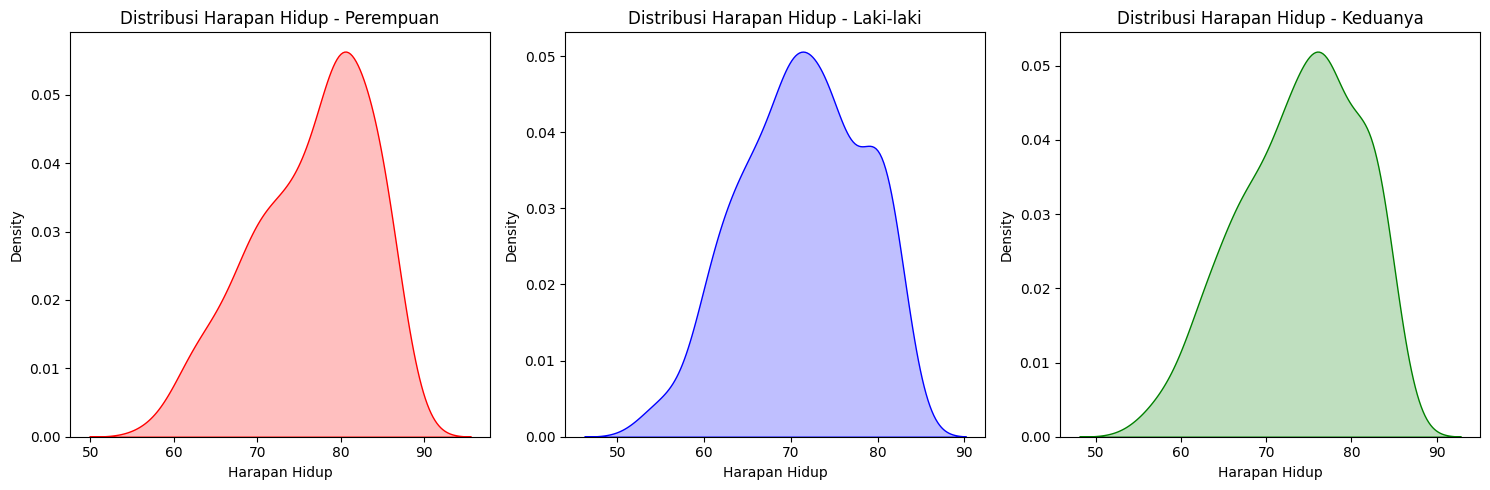

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ukuran figure
plt.figure(figsize=(15, 5))

# Distribusi harapan hidup Perempuan
plt.subplot(1, 3, 1)
sns.kdeplot(df['Sum of Females  Life Expectancy'], color='red', shade=True)
plt.title('Distribusi Harapan Hidup - Perempuan')
plt.xlabel('Harapan Hidup')
plt.ylabel('Density')

# Distribusi harapan hidup Laki-laki
plt.subplot(1, 3, 2)
sns.kdeplot(df['Sum of Males  Life Expectancy'], color='blue', shade=True)
plt.title('Distribusi Harapan Hidup - Laki-laki')
plt.xlabel('Harapan Hidup')
plt.ylabel('Density')

# Distribusi harapan hidup Keduanya
plt.subplot(1, 3, 3)
sns.kdeplot(df['Sum of Life Expectancy  (both sexes)'], color='green', shade=True)
plt.title('Distribusi Harapan Hidup - Keduanya')
plt.xlabel('Harapan Hidup')
plt.ylabel('Density')

# Tampilkan plot
plt.tight_layout()
plt.show()


Dari grafik di bawah terlihat hubungan antar variabel yang sangat kuat

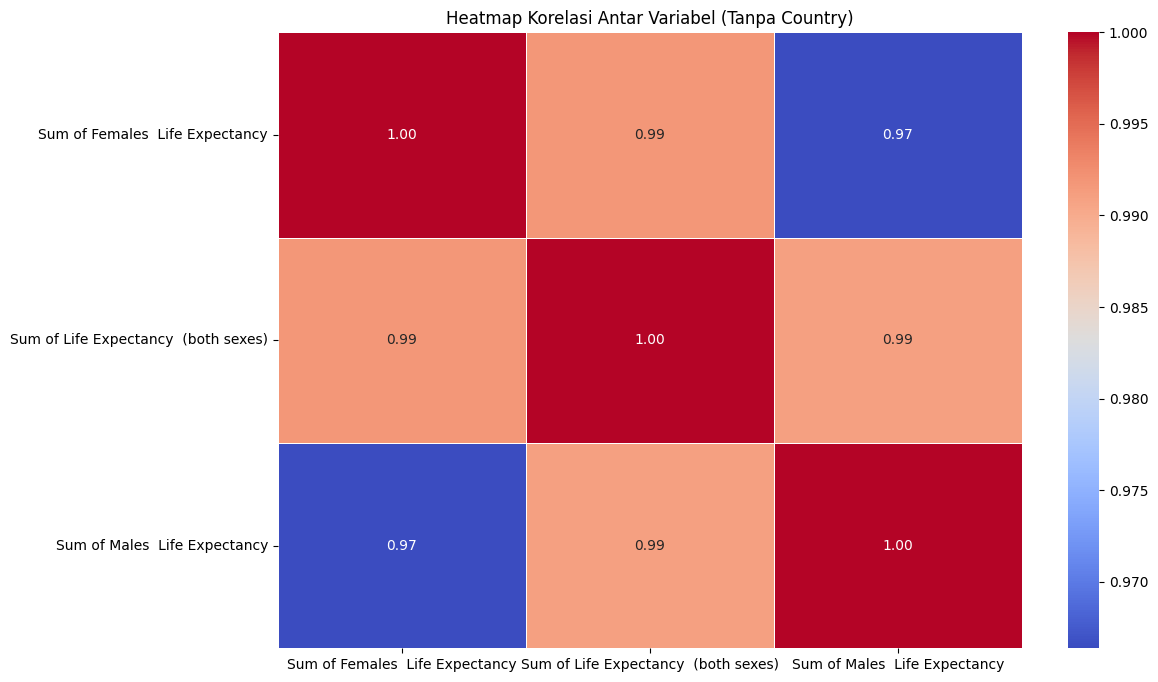

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghapus kolom 'Country' jika ada
df_numeric = df.select_dtypes(include=['number'])  # Memilih hanya kolom numerik

# Hitung matriks korelasi
corr_matrix = df_numeric.corr()

# Buat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Tambahkan judul
plt.title('Heatmap Korelasi Antar Variabel (Tanpa Country)')
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler

# Pilih fitur yang relevan
columns_to_use = ['Sum of Females  Life Expectancy','Sum of Life Expectancy  (both sexes)','Sum of Males  Life Expectancy']

df_selected = df[columns_to_use].dropna()

# Normalisasi data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)


**Model Training**

Menggunakan epsilon (jarak yang menentukan lingkungan sekitar sebuah titik data) yaitu 1 dan min_samples (jumlah minimal titik dalam radius) yaitu 3

Jumlah data di Cluster -1: 1
Jumlah data di Cluster 0: 197


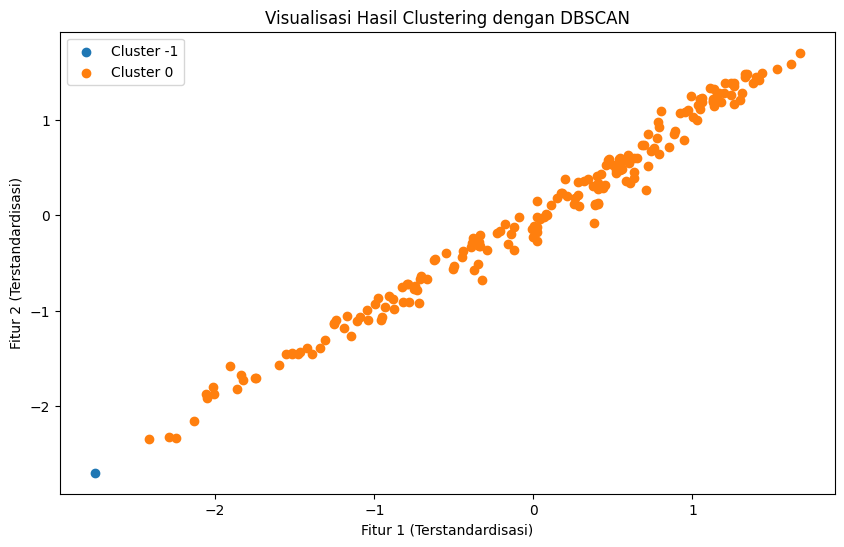

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from collections import Counter

dbscan = DBSCAN(eps=0.5, min_samples=3)
clusters = dbscan.fit_predict(df_scaled)

# Hitung jumlah data dalam setiap kluster
cluster_counts = Counter(clusters)

# Tampilkan jumlah tiap kluster
for cluster, count in cluster_counts.items():
    print(f"Jumlah data di Cluster {cluster}: {count}")

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))

# Warna berbeda untuk setiap cluster
unique_clusters = np.unique(clusters)
for cluster in unique_clusters:
    plt.scatter(df_scaled[clusters == cluster, 0], df_scaled[clusters == cluster, 1],
                label=f'Cluster {cluster}')

# Tambahkan judul dan label
plt.title("Visualisasi Hasil Clustering dengan DBSCAN")
plt.xlabel("Fitur 1 (Terstandardisasi)")
plt.ylabel("Fitur 2 (Terstandardisasi)")
plt.legend()
plt.show()


In [32]:
# Buat DataFrame baru dari data yang telah dinormalisasi
df_clustered = pd.DataFrame(df_scaled, columns=['Sum of Females Life Expectancy',
                                                'Sum of Life Expectancy (both sexes)',
                                                'Sum of Males Life Expectancy'])

# Tambahkan kembali kolom 'Country' ke dalam DataFrame
df_clustered['Country'] = df['Country'].values

# Simpan hasil clustering ke dalam DataFrame
df_clustered['Cluster'] = clusters

# Filter data untuk Cluster -1 (outlier)
outlier_data = df_clustered[df_clustered['Cluster'] == -1]

# Tampilkan negara yang termasuk outlier
print("Negara yang termasuk outlier:")
print(outlier_data[['Country', 'Sum of Females Life Expectancy',
                    'Sum of Life Expectancy (both sexes)',
                    'Sum of Males Life Expectancy', 'Cluster']])


Negara yang termasuk outlier:
  Country  Sum of Females Life Expectancy  \
0    Chad                       -2.755649   

   Sum of Life Expectancy (both sexes)  Sum of Males Life Expectancy  Cluster  
0                            -2.699071                      -2.59557       -1  


**Evaluation**

In [33]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_avg = silhouette_score(df_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg}")

davies_bouldin_index = davies_bouldin_score(df_scaled, clusters)
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Silhouette Score: 0.48538706188751285
Davies-Bouldin Index: 0.30805231473836603
